# Начало работы с машинным обучением

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris_info = load_iris() # загрузка датасета с ирисами, включая описание датасета и сам датасет 

# это специальный объект 
print(type(iris_info))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
print(iris_info.keys())
iris_info['target_names']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data_iris = iris_info.data
target_iris = iris_info.target

In [6]:
# создадим датафрейм из признаков ирисов и соответственно их класса

df_iris = pd.DataFrame(data_iris, columns=iris_info.feature_names)
df_iris['iris_type'] = target_iris
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
target_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Взгляд на данные

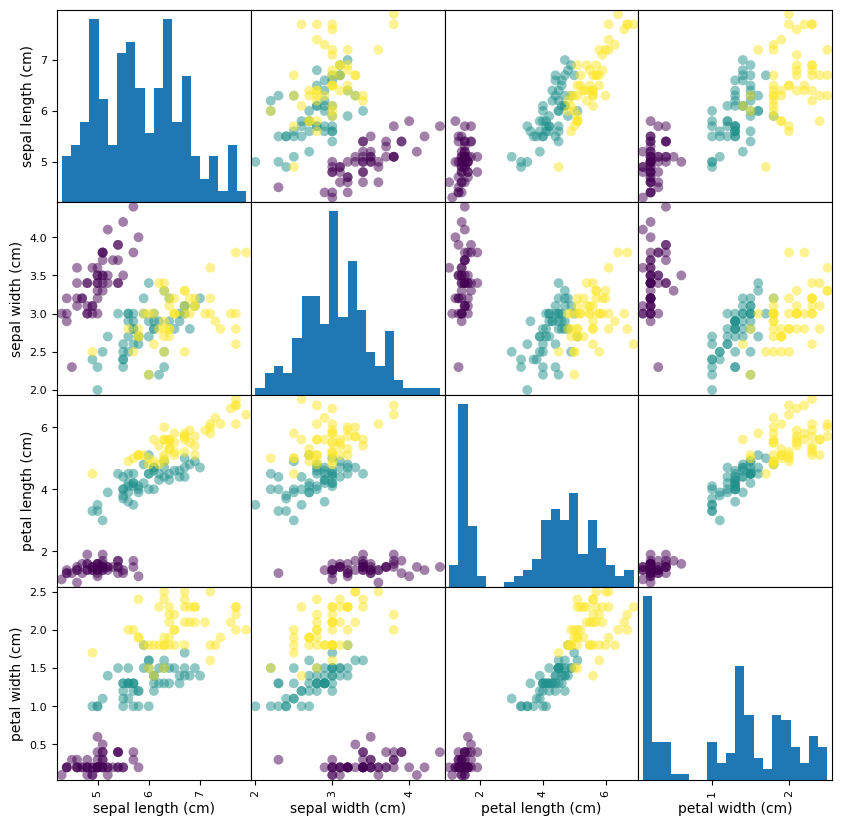

In [8]:
scatter_matrix = pd.plotting.scatter_matrix(df_iris[iris_info.feature_names],\
                                            marker='o', figsize=(10,10), hist_kwds={'bins':20}, s=50,\
                                            c=df_iris['iris_type'])

In [9]:
df_iris.describe() # некоторая сводная информация по датафрейму

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Обучающая и тестовая выборка с использование train_test_split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_iris, target_iris) # 75% тренировочных данных и 25% тестовых

### Создание модели машинного обучения

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)  # "регистрация" модели cо стартовыми параметрами (гипермапарметрами*)

# теперь в перменной knn хранится объект (модель) - алгоритмы для обучения

### Обучение модели

In [15]:
knn.fit(X_train, y_train) # возвращает натренированный объект knn

KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.get_params()  # многие параметры стоят как стандартные! 

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

### Предсказание результатов

In [17]:
new_iris = [[6.7, 3.2, 3.9, 1.9]]

In [18]:
new_prediction = knn.predict(new_iris)
print(f'Новый ирис предсказан как: {iris_info.target_names[new_prediction]}')

Новый ирис предсказан как: ['versicolor']


In [19]:
# теперь предскажем для тестового набора
y_predict = knn.predict(X_test)
y_predict[1]

1

In [ ]:
print(f'Правильность (accuracy) на тестовой выборке : {knn.score(X_test,y_test):.2f}')

In [ ]:
np.mean(y_predict == y_test)  # альтернативная запись правильности (точности) ответов

In [ ]:
print(f'Правильность (accuracy) на обучающей выборке : {knn.score(X_train, y_train):.2f}')